In [1]:
#conda install pytorch torchvision cudatoolkit=10.1 -c pytorch
import numpy as np
import torch

### WHAT IS PYTORCH?
It’s a Python-based scientific computing package targeted at two sets of audiences:

    A replacement for NumPy to use the power of GPUs
    a deep learning research platform that provides maximum flexibility and speed

#### Getting Started
Tensors
Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

##### NOTE

An uninitialized matrix is declared, but does not contain definite known values before it is used. When an uninitialized matrix is created, whatever values were in the allocated memory at the time will appear as the initial values.

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[9.0919e-39, 9.2755e-39, 8.4490e-39],
        [1.0102e-38, 9.0919e-39, 1.0102e-38],
        [8.9082e-39, 8.4489e-39, 9.6429e-39],
        [8.4490e-39, 9.6429e-39, 9.2755e-39],
        [1.0286e-38, 9.0919e-39, 8.9082e-39]])


Construct a randomly initialized matrix:

In [3]:
x = torch.rand(5, 3) ##uniform distribution
print(x)

tensor([[0.3994, 0.7288, 0.1531],
        [0.7653, 0.5106, 0.2760],
        [0.7489, 0.3782, 0.5680],
        [0.4331, 0.7091, 0.6725],
        [0.4841, 0.8967, 0.9157]])


Construct a matrix filled zeros and of dtype long:  (64-bit integer (signed))

In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:

In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods will reuse properties of the input tensor, e.g. dtype, unless new values are provided by user

In [6]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.1504,  0.1161, -1.6322],
        [-2.5082, -0.4457,  0.8398],
        [ 1.0572,  1.3848, -0.5259],
        [-0.3943,  1.1882,  2.1907],
        [ 1.3709,  0.1671,  1.1368]])


Get its size:

###### Note
torch.Size is in fact a tuple, so it supports all tuple operations.

In [7]:
print(x.size())

torch.Size([5, 3])


#### Operations
There are multiple syntaxes for operations. In the following example, we will take a look at the addition operation.

Addition: syntax 1

In [8]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 0.5737,  0.8664, -1.0770],
        [-2.0292,  0.3507,  1.2516],
        [ 1.2465,  2.3795, -0.0753],
        [-0.0634,  2.0439,  2.5195],
        [ 2.0161,  0.4779,  2.0709]])


Addition: syntax 2

In [9]:
print(torch.add(x, y))

tensor([[ 0.5737,  0.8664, -1.0770],
        [-2.0292,  0.3507,  1.2516],
        [ 1.2465,  2.3795, -0.0753],
        [-0.0634,  2.0439,  2.5195],
        [ 2.0161,  0.4779,  2.0709]])


Addition: providing an output tensor as argument

In [10]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.5737,  0.8664, -1.0770],
        [-2.0292,  0.3507,  1.2516],
        [ 1.2465,  2.3795, -0.0753],
        [-0.0634,  2.0439,  2.5195],
        [ 2.0161,  0.4779,  2.0709]])


Addition in place

In [11]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 0.5737,  0.8664, -1.0770],
        [-2.0292,  0.3507,  1.2516],
        [ 1.2465,  2.3795, -0.0753],
        [-0.0634,  2.0439,  2.5195],
        [ 2.0161,  0.4779,  2.0709]])


#### NOTE

Any operation that mutates a tensor in-place is post-fixed with an _. 
   
       For example: x.copy_(y), x.t_(), will change x. (transpose)

You can use standard NumPy-like indexing with all bells and whistles!

In [12]:
print(x)
print(x[:, 1])

tensor([[ 0.1504,  0.1161, -1.6322],
        [-2.5082, -0.4457,  0.8398],
        [ 1.0572,  1.3848, -0.5259],
        [-0.3943,  1.1882,  2.1907],
        [ 1.3709,  0.1671,  1.1368]])
tensor([ 0.1161, -0.4457,  1.3848,  1.1882,  0.1671])


Resizing: If you want to resize/reshape tensor, you can use torch.view:

In [13]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use .item() to get the value as a Python number

In [14]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.5922])
0.5921700596809387


### NumPy Bridge
Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other.

##### Converting a Torch Tensor to a NumPy Array

In [15]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


See how the numpy array changed in value.

In [16]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


###### Converting NumPy Array to Torch Tensor
See how changing the np array changed the Torch Tensor automatically

In [17]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to NumPy and back. 8-bit integer (signed)

#### CUDA Tensors
Tensors can be moved onto any device using the .to method.

In [18]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([1.5922], device='cuda:0')
tensor([1.5922], dtype=torch.float64)


#### Autograd

Autograd is now a core torch package for automatic differentiation. It uses a tape based system for automatic differentiation.

In the forward phase, the autograd tape will remember all the operations it executed, and in the backward phase, it will replay the operations.

For further detail, see: https://justindomke.wordpress.com/2009/03/24/a-simple-explanation-of-reverse-mode-automatic-differentiation/

##### Tensors that track history
In autograd, if any input Tensor of an operation has requires_grad=True, the computation will be tracked. After computing the backward pass, a gradient w.r.t. this tensor is accumulated into .grad attribute.

There’s one more class which is very important for autograd implementation - a Function. Tensor and Function are interconnected and build up an acyclic graph, that encodes a complete history of computation. Each variable has a .grad_fn attribute that references a function that has created a function (except for Tensors created by the user - these have None as .grad_fn).

If you want to compute the derivatives, you can call .backward() on a Tensor. If Tensor is a scalar (i.e. it holds a one element tensor), you don’t need to specify any arguments to backward(), however if it has more elements, you need to specify a grad_output argument that is a tensor of matching shape.

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

Create a tensor and set requires_grad=True to track computation with it

In [19]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [20]:
# x = torch.ones(2, 2, requires_grad=False)
# print(x)

In [21]:
print(x.data)

tensor([[1., 1.],
        [1., 1.]])


In [22]:
print(x.grad)

None


In [23]:
print(x.grad_fn)  # we've created x ourselves

None


Do an operation on x:

In [24]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [25]:
y.requires_grad_(True)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)

In [26]:
print(y.grad_fn)

y was created as the result of an operation, so it has a grad_fn

More operations on y:

In [27]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


.requires_grad_( ... ) changes an existing Tensor’s requires_grad flag in-place. The input flag defaults to True if not given.

In [28]:
a = torch.randn(2, 2)
print(a.requires_grad)
a = ((a * 3) / (a - 1))
print(a)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
tensor([[-5.3671e-04, -1.3194e+01],
        [ 2.0101e+00,  5.5170e+00]])
False
True


### Gradients

let's use backprop now and print $ \frac {\partial}{\partial x}out$

Let’s backprop now. Because out contains a single scalar, out.backward() is equivalent to out.backward(torch.tensor(1.)).



In [29]:
out.backward()

In [30]:
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [31]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


<img src="autograd.jpg">

https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

By default, gradient computation flushes all the internal buffers contained in the graph, so if you even want to do the backward on some part of the graph twice, you need to pass in retain_variables = True during the first pass.

just backprop random gradients

backward(gradient=None, retain_graph=None, create_graph=False)

Computes the gradient of current tensor w.r.t. graph leaves.

The graph is differentiated using the chain rule. If the tensor is non-scalar (i.e. its data has more than one element) and requires gradient, the function additionally requires specifying gradient. It should be a tensor of matching type and location, that contains the gradient of the differentiated function w.r.t. self.

This function accumulates gradients in the leaves - you might need to zero them before calling it.


    Parameters
    gradient (Tensor or None) – Gradient w.r.t. the tensor. If it is a tensor, it will be automatically converted to a Tensor that does not require grad unless create_graph is True. None values can be specified for scalar Tensors or ones that don’t require grad. If a None value would be acceptable then this argument is optional.

    retain_graph (bool, optional) – If False, the graph used to compute the grads will be freed. Note that in nearly all cases setting this option to True is not needed and often can be worked around in a much more efficient way. Defaults to the value of create_graph.

    create_graph (bool, optional) – If True, graph of the derivative will be constructed, allowing to compute higher order derivative products. Defaults to False.
    
https://pytorch.org/docs/stable/tensors.html#torch.Tensor.backward

Now let’s take a look at an example of vector-Jacobian product:

In [32]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([  123.4022,  -163.8910, -1024.1586], grad_fn=<MulBackward0>)


Now in this case y is no longer a scalar. torch.autograd could not compute the full Jacobian directly, but if we just want the vector-Jacobian product, simply pass the vector to backward as argument:

In [33]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


You can also stop autograd from tracking history on Tensors with requires_grad=True by wrapping the code block in with torch.no_grad():

In [34]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


Or by using .detach() to get a new Tensor with the same content but that does not require gradients:

In [35]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


#### Logistic Regression in Pytorch

In [36]:
import matplotlib.pyplot as plt
import torchvision.datasets
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
%matplotlib inline

In [37]:
print(device)

cuda:0


In [38]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                 train=True,
                 transform=torchvision.transforms.ToTensor(),
                 download=True)

In [39]:
print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [40]:
test_dataset = torchvision.datasets.MNIST(root='./data',
                 train=False,
                 transform=torchvision.transforms.ToTensor(),
                 download=True)

In [41]:
print(test_dataset)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


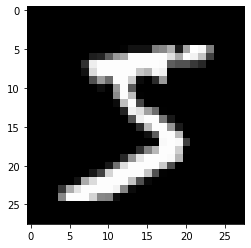

In [42]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

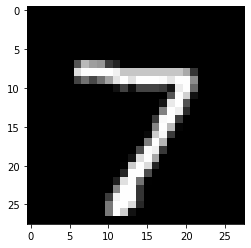

In [43]:
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [44]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=64,
                                           shuffle=True)

In [45]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                           batch_size=64,
                                           shuffle=True)

In [46]:
import torch.nn as nn
import torch.nn.functional as F

In [47]:
class LogisticRegression(nn.Module):
    '''
    Logistic regression, pytorch style
    '''
    def __init__(self, input_size, out_size):
        #super(LogisticRegression, self).__init__()
        super().__init__()
        self.input_size = input_size
        self.out_size = out_size
        self.linear = nn.Linear(self.input_size, self.out_size)
        
        
    def forward(self, x):
        x = x.to(device).view(-1, self.input_size)
        x = self.linear(x)          
        return x
        #return F.log_softmax(x, dim =1)

input_size = 28*28 
out_size = 10  
clf = LogisticRegression(input_size, out_size)
clf = clf.to(device)

In [48]:
print(clf)

LogisticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [49]:
import torch.optim as optim

In [50]:
#criterion = nn.NLLLoss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(clf.parameters(), lr = 0.005)

In [51]:
epochs = 20

In [52]:
%%time
train_costs, test_costs= [],[]
for epoch in range(epochs+1):
    train_loss = 0.0
    for X, Y in train_loader:
        #Send X and Y to a given device for optimized parameter updates (CUDA or CPU)
        output, target = X.to(device), Y.to(device).view(-1)
        output = clf(output)
        #Compute the loss for the model's prediction and the true value of Y
        loss = criterion(output, target)
        #Add the train loss value to our train loss accumulator
        train_loss += loss.item()
        #Initialize gradient to zero
        optimizer.zero_grad()
        #Compute the derivate of the loss w.r.t each parameter via backprop 
        loss.backward()
        #Use the optimizer to update parameters
        optimizer.step()
    
    #normalize loss by m_train and add to train_costs list
    train_costs.append(train_loss / len(train_loader))
     
    test_loss = 0.0
    with torch.no_grad():
        for X, Y in test_loader:
            output, target = X.to(device), Y.to(device).view(-1)
            #Compute model's guess for X (data) 
            output = clf(output)                
            #Compute loss of X and Y 
            loss = criterion(output, target)
            #Add test loss of current batch to test loss accumulator 
            test_loss += loss.item()

        #normalize loss by m_test and add to test_costs list
        test_costs.append(test_loss/len(test_loader))

Wall time: 2min 14s


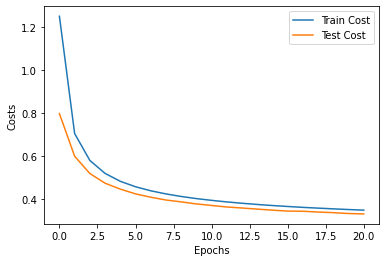

In [53]:
plt.plot(train_costs, label ='Train Cost')
plt.plot(test_costs, label ='Test Cost')
plt.ylabel('Costs')
plt.xlabel('Epochs')
plt.legend()
plt.show()
    

In [54]:
def get_accuracy(model, loader):
    num_samples = 0
    num_correct = 0
    with torch.no_grad():
        for X, Y in loader:
            x, y = X.to(device), Y.to(device).view(-1)
            y_pred = model(x)
            _, preds = y_pred.data.max(1)
            num_samples += preds.size(0)
            num_correct += (y == preds).sum()
        
    return num_correct.item() / num_samples

In [55]:
print(get_accuracy(clf, train_loader))
print(get_accuracy(clf, test_loader))

0.9041
0.9094
